In [1]:
# === Core Libraries ===
import os
import sys
import re
import pickle
import numpy as np
import pandas as pd
from collections import Counter
import glob

# === NLP & Text Preprocessing ===
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

# === Machine Learning ===
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# === OCR and Image Handling ===
import cv2
import easyocr

# === PyTorch (Optional for future CV models) ===
import torchvision



C:\Users\USER\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
ad_df= pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\ML 2\AD_DATA.csv")
no_ad_df= pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\ML 2\NO_AD_DATA.csv")

In [3]:
ad_df.head()

,filename,label
0,/AD_IMG/0 (1).png,ad
1,/AD_IMG/0 (10).png,ad
2,/AD_IMG/0 (11).png,ad
3,/AD_IMG/0 (12).png,ad
4,/AD_IMG/0 (13).png,ad


In [4]:
# Create reader only once
reader = easyocr.Reader(['en'])

def extract_text_easyocr(image_path):
    """
    Extracts and cleans text from an image using EasyOCR.
    Args:
        image_path (str): Path to the image file.
    Returns:
        str: Cleaned extracted text.
    """
    try:
        results = reader.readtext(image_path, detail=0)
        raw_text = ' '.join(results)
        text = raw_text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    except Exception as e:
        print(f"[ERROR] Failed to process {image_path}: {e}")
        return ""

# Process all images in directory
image_directory = r"C:\Users\USER\OneDrive\Desktop\ML 2\AD_IMG"
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']

# Get all image files
image_files = []
for extension in image_extensions:
    image_files.extend(glob.glob(os.path.join(image_directory, extension)))

# Extract text from all images
extracted_texts = []
for image_file in image_files:
    text = extract_text_easyocr(image_file)
    extracted_texts.append(text)
    print(f"Processed: {os.path.basename(image_file)}")

# Assign to DataFrame (assuming you have same number of images as DataFrame rows)
if len(extracted_texts) == len(ad_df):
    ad_df["text"] = extracted_texts
else:
    print(f"Warning: Found {len(extracted_texts)} images but DataFrame has {len(ad_df)} rows")
    
print(f"Processed {len(extracted_texts)} images")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\USER\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Processed: 0 (1).png
Processed: 0 (10).png
Processed: 0 (11).png
Processed: 0 (12).png
Processed: 0 (13).png
Processed: 0 (14).png
Processed: 0 (15).png
Processed: 0 (2).png
Processed: 0 (3).png
Processed: 0 (4).png
Processed: 0 (5).png
Processed: 0 (6).png
Processed: 0 (7).png
Processed: 0 (8).png
Processed: 0 (9).png
Processed: 1 copy.png
Processed: 1.png
Processed: 10 copy.png
Processed: 10.png
Processed: 11 copy.png
Processed: 11.png
Processed: 12 copy.png
Processed: 12.png
Processed: 13 copy.png
Processed: 13.png
Processed: 14 copy.png
Processed: 14.png
Processed: 15 copy.png
Processed: 15.png
Processed: 2 (1).png
Processed: 2 (10).png
Processed: 2 (11).png
Processed: 2 (12).png
[ERROR] Failed to process C:\Users\USER\OneDrive\Desktop\ML 2\AD_IMG\2 (14).png: 'NoneType' object has no attribute 'shape'
Processed: 2 (14).png
Processed: 2 (15).png
Processed: 2 (2).png
Processed: 2 (3).png
Processed: 2 (4).png
Processed: 2 (5).png
Processed: 2 (6).png
Processed: 2 (7).png
Processed: 2 

In [5]:
# Create reader only once
reader = easyocr.Reader(['en'])

def extract_text_easyocr(image_path):
    """
    Extracts and cleans text from an image using EasyOCR.
    Args:
        image_path (str): Path to the image file.
    Returns:
        str: Cleaned extracted text.
    """
    try:
        results = reader.readtext(image_path, detail=0)
        raw_text = ' '.join(results)
        text = raw_text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    except Exception as e:
        print(f"[ERROR] Failed to process {image_path}: {e}")
        return ""

# Process all images in directory
image_directory = r"C:\Users\USER\OneDrive\Desktop\ML 2\NO_AD_IMG"
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']

# Get all image files
image_files = []
for extension in image_extensions:
    image_files.extend(glob.glob(os.path.join(image_directory, extension)))

# Extract text from all images
extracted_texts = []
for image_file in image_files:
    text = extract_text_easyocr(image_file)
    extracted_texts.append(text)
    print(f"Processed: {os.path.basename(image_file)}")

# Assign to DataFrame (assuming you have same number of images as DataFrame rows)
if len(extracted_texts) == len(no_ad_df):
    no_ad_df["text"] = extracted_texts
else:
    print(f"Warning: Found {len(extracted_texts)} images but DataFrame has {len(no_ad_df)} rows")
    
print(f"Processed {len(extracted_texts)} images")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\USER\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Processed: 1.png
Processed: 10.png
Processed: 10_th_1458257534.png
Processed: 1_th_1457123292.png
Processed: 1_th_1457123845.png
Processed: 1_th_1457140827.png
Processed: 1_th_1457141259.png
Processed: 1_th_1457150708.png
Processed: 1_th_1457151113.png
Processed: 1_th_1457173657.png
Processed: 1_th_1457174105.png
Processed: 1_th_1457174268.png
Processed: 1_th_1457176018.png
Processed: 1_th_1457187119.png
Processed: 1_th_1457187275.png
Processed: 1_th_1457187697.png
Processed: 1_th_1457187935.png
Processed: 1_th_1457195539.png
Processed: 1_th_1457195823.png
Processed: 1_th_1457198272.png
Processed: 1_th_1457199262.png
Processed: 1_th_1457284205.png
Processed: 1_th_1457284553.png
Processed: 1_th_1457305953.png
Processed: 1_th_1457306459.png
Processed: 1_th_1457449589.png
Processed: 1_th_1457452206.png
Processed: 1_th_1457469186.png
Processed: 1_th_1457469473.png
Processed: 1_th_1457532950.png
Processed: 1_th_1457533184.png
Processed: 1_th_1457533265.png
Processed: 1_th_1457533512.png
Pro

In [6]:
# Display your DataFrame structure
print("DataFrame Info:")
print(f"Shape: {ad_df.shape}")
print(f"Columns: {ad_df.columns.tolist()}")
print("\nFirst few rows:")
print(ad_df.head())

# Check text extraction quality
print("\nText lengths:")
print(ad_df['text'].str.len().describe())

# Check for empty texts
empty_texts = ad_df['text'].str.strip() == ''
print(f"\nEmpty text extractions: {empty_texts.sum()}")

DataFrame Info:
Shape: (150, 3)
Columns: ['filename', 'label', 'text']

First few rows:
             filename label                                               text
0   /AD_IMG/0 (1).png    ad  zooske dating site the 1 app free to browse ww...
1  /AD_IMG/0 (10).png    ad  find love dating sites nov 2011 bryan roberts ...
2  /AD_IMG/0 (11).png    ad  oadoo want meet new peofle someone 150 million...
3  /AD_IMG/0 (12).png    ad  badoo meet new people i50 million of them want...
4  /AD_IMG/0 (13).png    ad  eharmony compatible people great naban angela ...

Text lengths:
count    150.000000
mean     135.926667
std       74.167966
min        0.000000
25%       80.000000
50%      122.000000
75%      182.500000
max      330.000000
Name: text, dtype: float64

Empty text extractions: 2


In [7]:
# Display your DataFrame structure
print("DataFrame Info:")
print(f"Shape: {no_ad_df.shape}")
print(f"Columns: {no_ad_df.columns.tolist()}")
print("\nFirst few rows:")
print(no_ad_df.head())

# Check text extraction quality
print("\nText lengths:")
print(no_ad_df['text'].str.len().describe())

# Check for empty texts
empty_texts = no_ad_df['text'].str.strip() == ''
print(f"\nEmpty text extractions: {empty_texts.sum()}")

DataFrame Info:
Shape: (633, 3)
Columns: ['filename', 'label', 'text']

First few rows:
                          filename  label                      text
0                 /NO_AD_IMG/1.png  no_ad  just do m then dot again
1                /NO_AD_IMG/10.png  no_ad                         9
2  /NO_AD_IMG/10_th_1458257534.png  no_ad                         0
3   /NO_AD_IMG/1_th_1457123292.png  no_ad                          
4   /NO_AD_IMG/1_th_1457123845.png  no_ad                          

Text lengths:
count    633.000000
mean       8.165877
std       43.299362
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      870.000000
Name: text, dtype: float64

Empty text extractions: 503


In [8]:
# Clean and improve the extracted text
def clean_extracted_text(text):
    """Further clean the extracted text"""
    if pd.isna(text) or text == '':
        return ''
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    # Fix common OCR errors (optional)
    text = text.replace('i50', '150')  # Common OCR mistake
    text = text.replace('peofle', 'people')  # Another common mistake
    
    return text

# Apply cleaning
ad_df['text_cleaned'] = ad_df['text'].apply(clean_extracted_text)

# Display sample results
print("Sample cleaned texts:")
for i in range(min(5, len(ad_df))):
    print(f"Row {i}: {ad_df['text_cleaned'].iloc[i][:100]}...")

Sample cleaned texts:
Row 0: zooske dating site the 1 app free to browse wwwzoosk coml photos verified by zoosk view nowl over 27...
Row 1: find love dating sites nov 2011 bryan roberts free...
Row 2: oadoo want meet new people someone 150 million of them to push my buttons mnhalti meet me at badooco...
Row 3: badoo meet new people 150 million of them want to wake up in a strange chty jik mhatlan meet me at b...
Row 4: eharmony compatible people great naban angela relationships matched ehanont get started now simply f...


In [43]:
combained_df = pd.concat([ad_df, no_ad_df], ignore_index=True)

In [9]:
# Download required NLTK data (run once)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
    
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

try:
    nltk.data.find('vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [44]:
# First, run this to download required NLTK data
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download required NLTK data
print("Downloading NLTK data...")
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
print("NLTK data downloaded successfully!")

# Alternative approach - Enhanced analyzer with error handling
import pandas as pd
import numpy as np
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

class EnhancedAdTextAnalyzer:
    """Enhanced NLP analyzer with better error handling and more features"""
    
    def __init__(self):
        try:
            self.stop_words = set(stopwords.words('english'))
            self.lemmatizer = WordNetLemmatizer()
            self.sia = SentimentIntensityAnalyzer()
            self.nltk_available = True
            print("NLTK components initialized successfully")
        except Exception as e:
            print(f"NLTK initialization error: {e}")
            self.nltk_available = False
            self.stop_words = set(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'])
        
        # Enhanced ad-related keywords
        self.ad_keywords = {
            'promotional': ['free', 'discount', 'sale', 'offer', 'deal', 'save', 'cheap', 'promo', 'bonus', 'gift'],
            'action': ['buy', 'shop', 'click', 'get', 'win', 'try', 'download', 'register', 'sign', 'join', 'order', 'purchase'],
            'urgency': ['now', 'today', 'limited', 'hurry', 'quick', 'fast', 'expires', 'soon', 'urgent', 'immediately'],
            'dating': ['dating', 'meet', 'love', 'match', 'single', 'chat', 'relationship', 'partner', 'romance'],
            'commerce': ['price', 'cost', 'money', 'payment', 'premium', 'upgrade', 'subscribe', 'trial', 'credit'],
            'superlatives': ['best', 'top', 'amazing', 'incredible', 'perfect', 'ultimate', 'exclusive', 'premium', 'guaranteed'],
            'emotional': ['beautiful', 'sexy', 'hot', 'attractive', 'gorgeous', 'stunning', 'amazing', 'fantastic'],
            'health': ['lose', 'weight', 'diet', 'fitness', 'healthy', 'pills', 'supplement', 'medical', 'doctor'],
            'financial': ['earn', 'income', 'rich', 'wealthy', 'investment', 'profit', 'cash', 'loan', 'credit']
        }
    
    def get_wordnet_pos(self, word):
        """Map POS tag to first character for lemmatization with error handling"""
        try:
            tag = pos_tag([word])[0][1][0].upper()
            tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
            return tag_dict.get(tag, wordnet.NOUN)
        except Exception:
            return wordnet.NOUN
    
    def basic_preprocess_text(self, text):
        """Basic preprocessing without advanced NLTK features"""
        if pd.isna(text) or text == '':
            return ''
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove special characters but keep alphanumeric and spaces
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
        
        # Remove extra whitespaces
        text = ' '.join(text.split())
        
        # Basic tokenization
        tokens = text.split()
        
        # Remove stopwords and short words
        tokens = [token for token in tokens if token not in self.stop_words and len(token) > 2]
        
        return ' '.join(tokens)
    
    def advanced_preprocess_text(self, text):
        """Advanced preprocessing with NLTK features"""
        if pd.isna(text) or text == '':
            return ''
        
        if not self.nltk_available:
            return self.basic_preprocess_text(text)
        
        try:
            # Convert to lowercase
            text = text.lower()
            
            # Remove special characters but keep alphanumeric and spaces
            text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
            
            # Remove extra whitespaces
            text = ' '.join(text.split())
            
            # Tokenize and lemmatize with POS tagging
            tokens = word_tokenize(text)
            tokens = [self.lemmatizer.lemmatize(token, self.get_wordnet_pos(token)) 
                     for token in tokens 
                     if token not in self.stop_words and len(token) > 2]
            
            return ' '.join(tokens)
        except Exception as e:
            print(f"Advanced preprocessing failed, falling back to basic: {e}")
            return self.basic_preprocess_text(text)
    
    def extract_comprehensive_features(self, text):
        """Extract comprehensive features from text"""
        features = {}
        
        if pd.isna(text) or text == '':
            return self._get_empty_features()
        
        text_lower = text.lower()
        words = text_lower.split()
        
        # Basic text features
        features['text_length'] = len(text)
        features['word_count'] = len(words)
        features['avg_word_length'] = np.mean([len(word) for word in words]) if words else 0
        features['char_count'] = len(text.replace(' ', ''))
        
        # Sentiment analysis
        if self.nltk_available:
            try:
                sentiment_scores = self.sia.polarity_scores(text)
                features['sentiment_positive'] = sentiment_scores['pos']
                features['sentiment_negative'] = sentiment_scores['neg']
                features['sentiment_neutral'] = sentiment_scores['neu']
                features['sentiment_compound'] = sentiment_scores['compound']
            except Exception:
                features.update({'sentiment_positive': 0, 'sentiment_negative': 0, 
                               'sentiment_neutral': 0, 'sentiment_compound': 0})
        else:
            features.update({'sentiment_positive': 0, 'sentiment_negative': 0, 
                           'sentiment_neutral': 0, 'sentiment_compound': 0})
        
        # Keyword category counts
        for category, keywords in self.ad_keywords.items():
            count = sum(1 for keyword in keywords if keyword in text_lower)
            features[f'{category}_words'] = count
        
        # Numerical and special character features
        numbers = re.findall(r'\d+', text)
        features['has_numbers'] = 1 if numbers else 0
        features['number_count'] = len(numbers)
        
        # Text style features
        features['capital_ratio'] = sum(1 for c in text if c.isupper()) / len(text) if text else 0
        features['exclamation_count'] = text.count('!')
        features['question_count'] = text.count('?')
        
        # Special patterns
        features['has_percentage'] = 1 if '%' in text or 'percent' in text_lower else 0
        features['has_currency'] = 1 if any(symbol in text for symbol in ['$', '₹', '€', '£', '¥']) else 0
        features['has_website'] = 1 if any(pattern in text_lower for pattern in ['www', 'http', '.com', '.org', '.net']) else 0
        features['has_email'] = 1 if '@' in text else 0
        features['has_phone'] = 1 if re.search(r'\d{3,}', text) else 0
        
        # Advanced linguistic features
        features['unique_word_ratio'] = len(set(words)) / len(words) if words else 0
        features['avg_sentence_length'] = len(words) / max(text.count('.') + text.count('!') + text.count('?'), 1)
        
        # Readability approximation
        features['flesch_approximation'] = self._calculate_flesch_approximation(text, words)
        
        return features
    
    def _get_empty_features(self):
        """Return empty features dictionary"""
        base_features = ['text_length', 'word_count', 'avg_word_length', 'char_count',
                        'sentiment_positive', 'sentiment_negative', 'sentiment_neutral', 'sentiment_compound',
                        'has_numbers', 'number_count', 'capital_ratio', 'exclamation_count', 'question_count',
                        'has_percentage', 'has_currency', 'has_website', 'has_email', 'has_phone',
                        'unique_word_ratio', 'avg_sentence_length', 'flesch_approximation']
        
        category_features = [f'{category}_words' for category in self.ad_keywords.keys()]
        
        return {feature: 0 for feature in base_features + category_features}
    
    def _calculate_flesch_approximation(self, text, words):
        """Simple approximation of Flesch Reading Ease"""
        if not words:
            return 0
        
        sentences = max(text.count('.') + text.count('!') + text.count('?'), 1)
        avg_sentence_length = len(words) / sentences
        avg_syllables = np.mean([self._count_syllables(word) for word in words])
        
        return 206.835 - (1.015 * avg_sentence_length) - (84.6 * avg_syllables)
    
    def _count_syllables(self, word):
        """Simple syllable counting"""
        word = word.lower()
        count = 0
        vowels = "aeiouy"
        if word[0] in vowels:
            count += 1
        for index in range(1, len(word)):
            if word[index] in vowels and word[index - 1] not in vowels:
                count += 1
        if word.endswith("e"):
            count -= 1
        if count == 0:
            count += 1
        return count

def run_enhanced_analysis(combined_df):
    """Run enhanced analysis with error handling"""
    
    analyzer = EnhancedAdTextAnalyzer()
    
    # Preprocess texts
    print("Enhanced preprocessing...")
    combined_df['text_enhanced'] = combined_df['text_cleaned'].apply(analyzer.advanced_preprocess_text)
    
    # Extract enhanced features
    print("Extracting enhanced features...")
    features_list = [analyzer.extract_comprehensive_features(text) for text in combined_df['text_cleaned']]
    features_df = pd.DataFrame(features_list)
    
    # Build multiple vectorizers
    print("Building text vectorizers...")
    vectorizers = {}
    
    # TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 3),
        stop_words='english',
        lowercase=True,
        min_df=2,
        max_df=0.8
    )
    
    # Count vectorizer
    count_vectorizer = CountVectorizer(
        max_features=3000,
        ngram_range=(1, 2),
        stop_words='english',
        lowercase=True,
        min_df=2
    )
    
    # Fit vectorizers
    tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['text_enhanced'])
    count_matrix = count_vectorizer.fit_transform(combined_df['text_enhanced'])
    
    vectorizers['tfidf'] = tfidf_vectorizer
    vectorizers['count'] = count_vectorizer
    
    # Scale numerical features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_df)
    
    # Combine features
    from scipy.sparse import hstack
    X_combined = hstack([tfidf_matrix, features_scaled])
    
    # Train models
    print("Training enhanced models...")
    X_train, X_test, y_train, y_test = train_test_split(
        X_combined, combined_df['label'], test_size=0.2, random_state=42, stratify=combined_df['label']
    )
    
    # Enhanced models
    models = {
        'Enhanced_LogisticRegression': LogisticRegression(random_state=42, max_iter=1000, C=1.0),
        'Enhanced_RandomForest': RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10),
        'Enhanced_SVM': SVC(kernel='rbf', random_state=42, C=1.0),
        'Enhanced_NaiveBayes': MultinomialNB(alpha=0.1)
    }
    
    results = {}
    
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            accuracy = accuracy_score(y_test, y_pred)
            results[model_name] = {
                'model': model,
                'accuracy': accuracy,
                'predictions': y_pred,
                'classification_report': classification_report(y_test, y_pred)
            }
            
            print(f"{model_name} Accuracy: {accuracy:.4f}")
            
        except Exception as e:
            print(f"Error training {model_name}: {e}")
    
    return analyzer, results, features_df, vectorizers, scaler

# Now run the analysis
print("Starting enhanced analysis...")
try:
    enhanced_analyzer, enhanced_results, enhanced_features, vectorizers, scaler = run_enhanced_analysis(combined_df)
    print("Enhanced analysis completed successfully!")
    
    # Display results
    print("\n" + "="*60)
    print("ENHANCED MODEL RESULTS")
    print("="*60)
    
    for model_name, result in enhanced_results.items():
        print(f"\n{model_name}:")
        print(f"  Accuracy: {result['accuracy']:.4f}")
        print("  Classification Report:")
        print(result['classification_report'])
        
except Exception as e:
    print(f"Error in enhanced analysis: {e}")
    print("Please ensure all required libraries are installed and try again.")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


NLTK data downloaded successfully!
Starting enhanced analysis...
NLTK components initialized successfully
Enhanced preprocessing...
Extracting enhanced features...
Building text vectorizers...
Training enhanced models...

Training Enhanced_LogisticRegression...
Enhanced_LogisticRegression Accuracy: 0.9936

Training Enhanced_RandomForest...
Enhanced_RandomForest Accuracy: 0.9936

Training Enhanced_SVM...
Enhanced_SVM Accuracy: 0.9936

Training Enhanced_NaiveBayes...
Error training Enhanced_NaiveBayes: Negative values in data passed to MultinomialNB (input X)
Enhanced analysis completed successfully!

ENHANCED MODEL RESULTS

Enhanced_LogisticRegression:
  Accuracy: 0.9936
  Classification Report:
              precision    recall  f1-score   support

          ad       1.00      0.97      0.98        30
       no_ad       0.99      1.00      1.00       127

    accuracy                           0.99       157
   macro avg       1.00      0.98      0.99       157
weighted avg       0.99 

In [45]:
# Choose the best performing model (you can change this logic as needed)
best_model_name = max(enhanced_results, key=lambda name: enhanced_results[name]['accuracy'])
best_model = enhanced_results[best_model_name]['model']
best_vectorizer = vectorizers['tfidf']  # or 'count' if you prefer CountVectorizer

# Save the model
with open("text_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

# Save the vectorizer
with open("text_vectorizor.pkl", "wb") as vec_file:
    pickle.dump(best_vectorizer, vec_file)

# Save the scaler
with open("text_scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print(f"\nSaved best model ({best_model_name}) as 'text_model.pkl'")
print("Saved vectorizer as 'text_vectorizor.pkl'")



Saved best model (Enhanced_LogisticRegression) as 'text_model.pkl'
Saved vectorizer as 'text_vectorizor.pkl'


In [13]:
# Now both datasets have the same structure
print("Dataset structures:")
print(f"Ad dataset columns: {ad_df.columns.tolist()}")
print(f"No-Ad dataset columns: {no_ad_df.columns.tolist()}")

# Combine the datasets
combined_df = pd.concat([ad_df, no_ad_df], ignore_index=True)

print(f"\nCombined dataset shape: {combined_df.shape}")
print(f"Label distribution:")
print(combined_df['label'].value_counts())



Dataset structures:
Ad dataset columns: ['filename', 'label', 'text', 'text_cleaned']
No-Ad dataset columns: ['filename', 'label', 'text']

Combined dataset shape: (783, 4)
Label distribution:
label
no_ad    633
ad       150
Name: count, dtype: int64


In [20]:


# Run this first to get the enhanced model
enhanced_analyzer, enhanced_results, enhanced_features, vectorizers, scaler = run_enhanced_analysis(combined_df)

NLTK components initialized successfully
Enhanced preprocessing...
Extracting enhanced features...
Building text vectorizers...
Training enhanced models...

Training Enhanced_LogisticRegression...
Enhanced_LogisticRegression Accuracy: 0.9936

Training Enhanced_RandomForest...
Enhanced_RandomForest Accuracy: 0.9936

Training Enhanced_SVM...
Enhanced_SVM Accuracy: 0.9936

Training Enhanced_NaiveBayes...
Error training Enhanced_NaiveBayes: Negative values in data passed to MultinomialNB (input X)


In [46]:
import pickle
import joblib
import os
from datetime import datetime

# Method 1: Fix the immediate issue
# If you have the enhanced_results from run_enhanced_analysis
try:
    # Get the best model from enhanced_results
    best_model_name = max(enhanced_results.keys(), key=lambda k: enhanced_results[k]['accuracy'])
    best_model = enhanced_results[best_model_name]['model']
    
    # Get the vectorizer from the vectorizers dictionary
    tfidf_vectorizer = vectorizers['tfidf']
    
    print(f"Best model: {best_model_name}")
    print(f"Best accuracy: {enhanced_results[best_model_name]['accuracy']:.4f}")
    
    # Save the models
    print("Saving models...")
    pickle.dump(best_model, open("best_model.pkl", "wb"))
    pickle.dump(tfidf_vectorizer, open("vectorizer.pkl", "wb"))
    pickle.dump(scaler, open("scaler.pkl", "wb"))
    
    print("Models saved successfully!")
    
except NameError as e:
    print(f"Variables not found: {e}")
    print("Please run the enhanced analysis first to create the required variables.")

# Method 2: Complete model saving function
def save_complete_model_pipeline(analyzer, results, features_df, vectorizers, scaler, 
                                save_dir="model_artifacts"):
    """
    Save complete model pipeline including all components
    """
    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    
    # Get timestamp for versioning
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Find best model
    best_model_name = max(results.keys(), key=lambda k: results[k]['accuracy'])
    best_model = results[best_model_name]['model']
    best_accuracy = results[best_model_name]['accuracy']
    
    print(f"Saving model pipeline...")
    print(f"Best model: {best_model_name}")
    print(f"Best accuracy: {best_accuracy:.4f}")
    
    # Save components
    artifacts = {
        'best_model': best_model,
        'model_name': best_model_name,
        'accuracy': best_accuracy,
        'tfidf_vectorizer': vectorizers['tfidf'],
        'count_vectorizer': vectorizers['count'],
        'scaler': scaler,
        'analyzer': analyzer,
        'features_df': features_df,
        'all_results': results,
        'timestamp': timestamp
    }
    
    # Save individual components
    for name, artifact in artifacts.items():
        if name not in ['timestamp', 'accuracy', 'model_name']:
            filename = f"{save_dir}/{name}_{timestamp}.pkl"
            try:
                # Use joblib for sklearn objects, pickle for others
                if hasattr(artifact, 'fit') or hasattr(artifact, 'transform'):
                    joblib.dump(artifact, filename)
                else:
                    pickle.dump(artifact, filename)
                print(f"✓ Saved {name}")
            except Exception as e:
                print(f"✗ Error saving {name}: {e}")
    
    # Save metadata
    metadata = {
        'model_name': best_model_name,
        'accuracy': best_accuracy,
        'timestamp': timestamp,
        'feature_count': len(features_df.columns),
        'vectorizer_vocab_size': len(vectorizers['tfidf'].vocabulary_)
    }
    
    with open(f"{save_dir}/metadata_{timestamp}.json", 'w') as f:
        import json
        json.dump(metadata, f, indent=2)
    
    print(f"\nModel pipeline saved in '{save_dir}' directory")
    return artifacts

# Method 3: Loading function
def load_complete_model_pipeline(save_dir="model_artifacts", timestamp=None):
    """
    Load complete model pipeline
    """
    if timestamp is None:
        # Find the most recent timestamp
        files = [f for f in os.listdir(save_dir) if f.startswith('best_model_')]
        if not files:
            raise FileNotFoundError("No model files found")
        timestamp = max([f.split('_')[2].split('.')[0] for f in files])
    
    print(f"Loading model pipeline from timestamp: {timestamp}")
    
    # Load components
    artifacts = {}
    components = ['best_model', 'tfidf_vectorizer', 'count_vectorizer', 'scaler', 'analyzer']
    
    for component in components:
        filename = f"{save_dir}/{component}_{timestamp}.pkl"
        try:
            if component in ['best_model', 'tfidf_vectorizer', 'count_vectorizer', 'scaler']:
                artifacts[component] = joblib.load(filename)
            else:
                artifacts[component] = pickle.load(open(filename, 'rb'))
            print(f"✓ Loaded {component}")
        except Exception as e:
            print(f"✗ Error loading {component}: {e}")
    
    # Load metadata
    try:
        with open(f"{save_dir}/metadata_{timestamp}.json", 'r') as f:
            import json
            metadata = json.load(f)
        print(f"✓ Loaded metadata - Model: {metadata['model_name']}, Accuracy: {metadata['accuracy']:.4f}")
        artifacts['metadata'] = metadata
    except Exception as e:
        print(f"✗ Error loading metadata: {e}")
    
    return artifacts

# Method 4: Prediction function using loaded model
def predict_with_loaded_model(text, artifacts):
    """
    Make prediction using loaded model artifacts
    """
    try:
        # Preprocess text
        analyzer = artifacts['analyzer']
        processed_text = analyzer.advanced_preprocess_text(text)
        
        # Extract features
        features = analyzer.extract_comprehensive_features(text)
        features_array = np.array([list(features.values())])
        
        # Scale features
        scaler = artifacts['scaler']
        features_scaled = scaler.transform(features_array)
        
        # Vectorize text
        tfidf_vectorizer = artifacts['tfidf_vectorizer']
        text_vectorized = tfidf_vectorizer.transform([processed_text])
        
        # Combine features
        from scipy.sparse import hstack
        X_combined = hstack([text_vectorized, features_scaled])
        
        # Make prediction
        model = artifacts['best_model']
        prediction = model.predict(X_combined)[0]
        probability = model.predict_proba(X_combined)[0] if hasattr(model, 'predict_proba') else None
        
        return {
            'prediction': prediction,
            'probability': probability,
            'processed_text': processed_text,
            'features': features
        }
        
    except Exception as e:
        print(f"Error making prediction: {e}")
        return None

# Usage examples:

# If you have the variables from enhanced analysis:
try:
    # Save current model
    save_complete_model_pipeline(enhanced_analyzer, enhanced_results, enhanced_features, vectorizers, scaler)
    
    # Or just fix the immediate saving issue:
    best_model_name = max(enhanced_results.keys(), key=lambda k: enhanced_results[k]['accuracy'])
    best_model = enhanced_results[best_model_name]['model']
    tfidf_vectorizer = vectorizers['tfidf']
    
    # Now save individual files
    pickle.dump(best_model, open("best_model.pkl", "wb"))
    pickle.dump(tfidf_vectorizer, open("vectorizer.pkl", "wb"))
    pickle.dump(scaler, open("scaler.pkl", "wb"))
    
    print("Individual files saved successfully!")
    
except NameError:
    print("Please run the enhanced analysis first to create the required variables:")
    print("enhanced_analyzer, enhanced_results, enhanced_features, vectorizers, scaler = run_enhanced_analysis(combined_df)")

# To load and use:
# artifacts = load_complete_model_pipeline()
# result = predict_with_loaded_model("Your text here", aartifacts)
# print(f"Prediction: {result['prediction']}")

Best model: Enhanced_LogisticRegression
Best accuracy: 0.9936
Saving models...
Models saved successfully!
Saving model pipeline...
Best model: Enhanced_LogisticRegression
Best accuracy: 0.9936
✓ Saved best_model
✓ Saved tfidf_vectorizer
✓ Saved count_vectorizer
✓ Saved scaler
✗ Error saving analyzer: file must have a 'write' attribute
✓ Saved features_df
✗ Error saving all_results: file must have a 'write' attribute

Model pipeline saved in 'model_artifacts' directory
Individual files saved successfully!


In [16]:
from IPython.display import FileLink, FileLinks

# For a single file:
display(FileLink("best_model.pkl"))

# For multiple files in a folder:
display(FileLinks("model_artifacts"))


C:\Users\USER\best_model.pkl

model_artifacts/
  best_model_20250706_143755.pkl
  best_model_20250708_085637.pkl
  count_vectorizer_20250706_143755.pkl
  count_vectorizer_20250708_085637.pkl
  features_df_20250706_143755.pkl
  features_df_20250708_085637.pkl
  metadata_20250706_143755.json
  metadata_20250708_085637.json
  scaler_20250706_143755.pkl
  scaler_20250708_085637.pkl
  tfidf_vectorizer_20250706_143755.pkl
  tfidf_vectorizer_20250708_085637.pkl

In [41]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pickle
import joblib
import os
from scipy.sparse import hstack, csr_matrix
import pandas as pd
import re
from collections import Counter
from typing import Dict, List, Optional, Union, Tuple
import warnings
warnings.filterwarnings('ignore')

class ImageAdPredictor:
    """
    Complete pipeline for predicting ads from images using OCR and ML
    """
    
    def __init__(self, model_path: str = "model_artifacts", gpu: bool = False):
        """
        Initialize the predictor with pre-trained models
        
        Args:
            model_path: Path to model artifacts directory
            gpu: Whether to use GPU for OCR (requires CUDA)
        """
        self.model_path = model_path
        self.gpu = gpu
        self.ocr_reader = None
        self.artifacts = None
        self.feature_names = self._get_feature_names()
        
        # Initialize components
        self.setup_ocr()
        self.load_models()
    
    def _get_feature_names(self) -> List[str]:
        """Get feature names for better interpretability"""
        return [
            'text_length', 'word_count', 'unique_words', 'exclamation_count',
            'question_count', 'dollar_count', 'percent_count', 'at_count',
            'hash_count', 'ampersand_count', 'uppercase_count', 'uppercase_words',
            'ad_keywords_count', 'punct_density', 'avg_word_length', 'digit_count',
            'number_count', 'url_count', 'email_count', 'positive_words',
            'negative_words', 'action_words', 'time_words', 'money_words',
            'phone_pattern', 'max_word_freq', 'asterisk_count', 'plus_count',
            'dash_count', 'equals_count'
        ]
    
    def setup_ocr(self) -> None:
        """Initialize EasyOCR reader"""
        try:
            print("🔄 Initializing EasyOCR...")
            self.ocr_reader = easyocr.Reader(['en'], gpu=self.gpu)
            print("✅ EasyOCR initialized successfully")
        except Exception as e:
            print(f"❌ Error initializing EasyOCR: {e}")
            print("💡 Install EasyOCR: pip install easyocr")
            raise
    
    def load_models(self) -> None:
        """Load pre-trained models and artifacts"""
        try:
            print("🔄 Loading pre-trained models...")
            
            if os.path.exists(self.model_path):
                self.artifacts = self._load_complete_pipeline()
            else:
                self.artifacts = self._load_individual_files()
            
            # Verify essential components
            if self.artifacts and self._validate_artifacts():
                print("✅ Models loaded successfully")
            else:
                print("⚠️  Warning: Some model components missing, creating demo model")
                self.create_demo_model()
                
        except Exception as e:
            print(f"❌ Error loading models: {e}")
            print("🔄 Creating demo model for testing...")
            self.create_demo_model()
    
    def _validate_artifacts(self) -> bool:
        """Validate that required artifacts are present"""
        required = ['best_model', 'tfidf_vectorizer']
        return all(component in self.artifacts for component in required)
    
    def _load_complete_pipeline(self) -> Optional[Dict]:
        """Load complete pipeline from artifacts directory"""
        try:
            files = [f for f in os.listdir(self.model_path) if f.startswith('best_model_')]
            if not files:
                return None
            
            # Extract timestamp
            timestamp = '_'.join(files[0].split('_')[2:4]).replace('.pkl', '')
            print(f"📅 Loading models from timestamp: {timestamp}")
            
            artifacts = {}
            components = {
                'best_model': 'best_model',
                'tfidf_vectorizer': 'tfidf_vectorizer',
                'scaler': 'scaler',
                'analyzer': 'analyzer'
            }
            
            for component, filename_prefix in components.items():
                filepath = os.path.join(self.model_path, f"{filename_prefix}_{timestamp}.pkl")
                if os.path.exists(filepath):
                    artifacts[component] = joblib.load(filepath)
                    print(f"✅ Loaded {component}")
                else:
                    print(f"⚠️  Missing {component}")
            
            return artifacts
            
        except Exception as e:
            print(f"❌ Error loading pipeline: {e}")
            return None
    
    def _load_individual_files(self) -> Optional[Dict]:
        """Load individual model files"""
        artifacts = {}
        file_mappings = {
            'best_model': 'best_model.pkl',
            'tfidf_vectorizer': 'vectorizer.pkl',
            'scaler': 'scaler.pkl'
        }
        
        for component, filename in file_mappings.items():
            if os.path.exists(filename):
                try:
                    artifacts[component] = joblib.load(filename)
                    print(f"✅ Loaded {component}")
                except Exception as e:
                    print(f"❌ Error loading {component}: {e}")
        
        return artifacts if artifacts else None
    
    def extract_text_from_image(self, image_input: Union[str, np.ndarray], 
                               confidence_threshold: float = 0.5) -> Optional[Dict]:
        """
        Extract text from image using EasyOCR
        
        Args:
            image_input: Image file path or numpy array
            confidence_threshold: Minimum confidence for text detection
            
        Returns:
            Dictionary with extracted text information
        """
        if self.ocr_reader is None:
            raise RuntimeError("OCR reader not initialized")
        
        try:
            # Load image
            if isinstance(image_input, str):
                if not os.path.exists(image_input):
                    raise FileNotFoundError(f"Image not found: {image_input}")
                image = cv2.imread(image_input)
                if image is None:
                    raise ValueError(f"Could not load image: {image_input}")
            else:
                image = image_input
            
            print("🔄 Extracting text from image...")
            results = self.ocr_reader.readtext(image)
            
            # Process results
            extracted_texts = []
            text_info = []
            
            for bbox, text, confidence in results:
                if confidence >= confidence_threshold:
                    extracted_texts.append(text)
                    text_info.append({
                        'text': text,
                        'confidence': confidence,
                        'bbox': bbox
                    })
            
            combined_text = ' '.join(extracted_texts)
            
            print(f"✅ Extracted {len(extracted_texts)} text segments")
            
            return {
                'combined_text': combined_text,
                'individual_texts': extracted_texts,
                'text_info': text_info,
                'raw_results': results
            }
            
        except Exception as e:
            print(f"❌ Error extracting text: {e}")
            return None
    
    def extract_comprehensive_features(self, text: str) -> np.ndarray:
        """
        Extract comprehensive features from text
        
        Args:
            text: Input text
            
        Returns:
            Feature array with 30 features
        """
        if not text:
            return np.zeros((1, 30))
        
        features = []
        
        # Basic text statistics
        features.append(len(text))  # text_length
        features.append(len(text.split()))  # word_count
        features.append(len(set(text.lower().split())))  # unique_words
        
        # Punctuation counts
        features.append(text.count('!'))  # exclamation_count
        features.append(text.count('?'))  # question_count
        features.append(text.count('$'))  # dollar_count
        features.append(text.count('%'))  # percent_count
        features.append(text.count('@'))  # at_count
        features.append(text.count('#'))  # hash_count
        features.append(text.count('&'))  # ampersand_count
        
        # Capitalization features
        features.append(sum(1 for c in text if c.isupper()))  # uppercase_count
        features.append(sum(1 for word in text.split() if word.isupper()))  # uppercase_words
        
        # Keyword features
        ad_keywords = ['sale', 'buy', 'free', 'offer', 'deal', 'discount', 'save', 
                      'now', 'limited', 'click', 'order', 'today', 'special']
        features.append(sum(1 for word in text.lower().split() if word in ad_keywords))
        
        # Punctuation density
        punct_count = sum(1 for c in text if c in '.,!?;:')
        features.append(punct_count / len(text) if len(text) > 0 else 0)
        
        # Average word length
        words = text.split()
        features.append(sum(len(word) for word in words) / len(words) if words else 0)
        
        # Number features
        features.append(sum(1 for char in text if char.isdigit()))  # digit_count
        features.append(len(re.findall(r'\d+', text)))  # number_count
        
        # URL/email patterns
        features.append(len(re.findall(r'http[s]?://\S+', text)))  # url_count
        features.append(len(re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text)))
        
        # Sentiment indicators
        positive_words = ['great', 'amazing', 'best', 'excellent', 'fantastic', 'awesome', 'perfect']
        negative_words = ['bad', 'terrible', 'worst', 'horrible', 'awful', 'poor']
        features.append(sum(1 for word in text.lower().split() if word in positive_words))
        features.append(sum(1 for word in text.lower().split() if word in negative_words))
        
        # Action words
        action_words = ['buy', 'get', 'order', 'purchase', 'download', 'subscribe', 'join', 'register', 'click']
        features.append(sum(1 for word in text.lower().split() if word in action_words))
        
        # Time-related words
        time_words = ['now', 'today', 'tomorrow', 'soon', 'limited', 'hurry', 'fast', 'quick', 'instant']
        features.append(sum(1 for word in text.lower().split() if word in time_words))
        
        # Money-related features
        money_words = ['free', 'cheap', 'expensive', 'cost', 'price', 'dollar', 'money', 'pay', 'cash']
        features.append(sum(1 for word in text.lower().split() if word in money_words))
        
        # Contact patterns
        features.append(len(re.findall(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', text)))  # phone_pattern
        
        # Repetition features
        words_list = text.lower().split()
        word_freq = Counter(words_list)
        features.append(max(word_freq.values()) if word_freq else 0)
        
        # Special characters
        features.append(text.count('*'))  # asterisk_count
        features.append(text.count('+'))  # plus_count
        features.append(text.count('-'))  # dash_count
        features.append(text.count('='))  # equals_count
        
        # Ensure exactly 30 features
        return np.array([features[:30]])
    
    def preprocess_text(self, text: str) -> str:
        """
        Preprocess text for vectorization
        
        Args:
            text: Input text
            
        Returns:
            Preprocessed text
        """
        if not text:
            return ''
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text)
        
        # Remove special characters but keep basic punctuation
        text = re.sub(r'[^\w\s.,!?-]', ' ', text)
        
        return text.strip()
    
    def predict_ad_from_text(self, text: str) -> Optional[Dict]:
        """
        Predict if text is an advertisement
        
        Args:
            text: Input text
            
        Returns:
            Prediction results dictionary
        """
        if not self.artifacts:
            raise RuntimeError("Models not loaded")
        
        try:
            model = self.artifacts['best_model']
            vectorizer = self.artifacts['tfidf_vectorizer']
            scaler = self.artifacts.get('scaler')
            
            # Preprocess text
            processed_text = self.preprocess_text(text)
            
            # Extract features
            text_features = self.extract_comprehensive_features(text)
            
            # Vectorize text
            text_vectorized = vectorizer.transform([processed_text])
            
            # Combine features if scaler is available
            if scaler is not None:
                try:
                    text_features_scaled = scaler.transform(text_features)
                    X_combined = hstack([text_vectorized, text_features_scaled])
                except:
                    # Fallback to text features only
                    X_combined = text_vectorized
            else:
                X_combined = text_vectorized
            
            # Make prediction
            prediction = model.predict(X_combined)[0]
            
            # Get probabilities
            probabilities = None
            confidence = None
            
            if hasattr(model, 'predict_proba'):
                prob_scores = model.predict_proba(X_combined)[0]
                classes = model.classes_
                probabilities = dict(zip(classes, prob_scores))
                confidence = max(prob_scores)
            
            return {
                'prediction': prediction,
                'probabilities': probabilities,
                'confidence': confidence,
                'processed_text': processed_text
            }
            
        except Exception as e:
            print(f"❌ Error making prediction: {e}")
            return None
    
    def predict_ad_from_image(self, image_path: str, confidence_threshold: float = 0.5, 
                             show_visualization: bool = True) -> Optional[Dict]:
        """
        Complete pipeline: Extract text from image and predict if it's an ad
        
        Args:
            image_path: Path to image file
            confidence_threshold: OCR confidence threshold
            show_visualization: Whether to show OCR visualization
            
        Returns:
            Complete prediction results
        """
        print(f"🖼️  Processing image: {image_path}")
        print("=" * 50)
        
        # Extract text from image
        ocr_result = self.extract_text_from_image(image_path, confidence_threshold)
        
        if not ocr_result:
            print("❌ Failed to extract text from image")
            return None
        
        # Display extracted text
        print(f"📝 Extracted Text: '{ocr_result['combined_text']}'")
        print(f"📊 Text segments found: {len(ocr_result['individual_texts'])}")
        
        # Visualize OCR results
        if show_visualization:
            self.visualize_ocr_results(image_path, ocr_result)
        
        # Make prediction
        if ocr_result['combined_text'].strip():
            prediction_result = self.predict_ad_from_text(ocr_result['combined_text'])
            
            if prediction_result:
                print(f"\n🎯 PREDICTION RESULTS:")
                print(f"   📊 Prediction: {prediction_result['prediction'].upper()}")
                
                if prediction_result['probabilities']:
                    print(f"   🎲 Confidence: {prediction_result['confidence']:.2%}")
                    print(f"   📈 Probabilities:")
                    for label, prob in prediction_result['probabilities'].items():
                        print(f"     {label}: {prob:.2%}")
                
                return {
                    'image_path': image_path,
                    'ocr_result': ocr_result,
                    'prediction_result': prediction_result,
                    'final_prediction': prediction_result['prediction'],
                    'confidence': prediction_result['confidence']
                }
            else:
                print("❌ Could not make prediction")
                return None
        else:
            print("❌ No text extracted from image")
            return None
    
    def visualize_ocr_results(self, image_path: str, ocr_result: Dict) -> None:
        """
        Visualize OCR results with bounding boxes
        
        Args:
            image_path: Path to image file
            ocr_result: OCR results dictionary
        """
        try:
            # Load and convert image
            image = cv2.imread(image_path)
            if image is None:
                print(f"❌ Could not load image: {image_path}")
                return
            
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Draw bounding boxes
            for info in ocr_result['text_info']:
                bbox = np.array(info['bbox'], dtype=np.int32)
                text = info['text']
                confidence = info['confidence']
                
                # Draw rectangle
                cv2.polylines(image_rgb, [bbox], True, (0, 255, 0), 2)
                
                # Add text label
                label_text = f"{text} ({confidence:.2f})"
                cv2.putText(image_rgb, label_text, 
                           (bbox[0][0], bbox[0][1] - 10), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
            
            # Display image
            plt.figure(figsize=(12, 8))
            plt.imshow(image_rgb)
            plt.axis('off')
            plt.title('OCR Results - Detected Text with Bounding Boxes')
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"❌ Could not visualize OCR results: {e}")
    
    def batch_predict_images(self, image_paths: List[str], 
                           confidence_threshold: float = 0.5) -> List[Dict]:
        """
        Predict multiple images at once
        
        Args:
            image_paths: List of image file paths
            confidence_threshold: OCR confidence threshold
            
        Returns:
            List of prediction results
        """
        results = []
        
        for i, image_path in enumerate(image_paths, 1):
            print(f"\n📸 Processing image {i}/{len(image_paths)}: {image_path}")
            
            result = self.predict_ad_from_image(
                image_path, 
                confidence_threshold, 
                show_visualization=False
            )
            
            if result:
                results.append({
                    'image_path': image_path,
                    'prediction': result['final_prediction'],
                    'confidence': result['confidence'],
                    'extracted_text': result['ocr_result']['combined_text']
                })
        
        return results
    
    def create_demo_model(self) -> None:
        """Create a demo model for testing when no pre-trained models are available"""
        print("🔄 Creating demo model...")
        
        from sklearn.feature_extraction.text import TfidfVectorizer
        from sklearn.linear_model import LogisticRegression
        
        ad_texts = [
            "Unlock massive savings with our exclusive 70% off sale!",
            "Shop now and enjoy free shipping on all orders this weekend!",
            "Limited time offer: Buy one, get one free on selected items!",
            "Flash sale alert! Everything must go - shop now!",
            "Subscribe today and get 30% off your first purchase!",
            "Hurry! Offer ends tonight - don't miss out on these amazing deals!",
            "New customers get 20% off with code WELCOME20!",
            "Free gift with every purchase over $50 - shop now!",
            "Act fast! Limited stock available on hot items!",
            "Join our loyalty program for exclusive perks and discounts!",
            "Get 50% off now! Limited time offer!",
            "Buy now and save big! Click here!",
            "Free shipping on all orders today!",
            "Sale ends soon! Don't miss out!",
            "Special discount just for you!",
            "Order now and get free delivery!",
            "Limited stock available - hurry up!",
            "Best prices guaranteed - shop now!",
            "Exclusive deal: Buy one, get one free!",
            "Hurry! Offer valid only till midnight!",
            "Subscribe today and save 30% on your first purchase!",
            "Flash sale: Everything must go!",
            "Sign up now to receive special discounts!",
            "Get your free trial before it’s too late!",
            "Don't miss this amazing clearance sale!",
            "Shop now and get bonus rewards points!",
            "Limited time coupon inside - redeem now!",
            "Act fast to grab these exclusive offers!",
            "New customers get 20% off with code NEW20!",
            "Click here to unlock your special deal!",
            "Save big during our weekend sale!",
            "Join our loyalty program for exclusive perks!",
            "Free gift with every purchase over $50!",
            "Clearance event - up to 70% off selected items!",
            "Order today and get free express shipping!",
            "Discount valid for 24 hours only!",
            "Buy more, save more with our tiered pricing!",
            "Use promo code SAVE10 at checkout!",
            "Get access to exclusive members-only sales!",
            "Try our new product risk-free for 30 days!",
            "Limited quantities available - order now!",
            "Don't wait - this offer expires soon!",
            "Save on your favorite brands today!",
            "Shop early for the best holiday deals!",
            "Exclusive online sale - prices slashed!",
            "Refer a friend and earn rewards!",
            "Join the waitlist for early access!",
            "Sign up and get a free eBook!",
            "Daily deals updated every morning!",
            "Hottest deals of the season - shop now!",
            "Get a free item with every purchase over $100!",
            "Limited time only: 40% off storewide!",
            "Check out our weekly specials and save!",
            "Free returns on all orders this month!",
            "Members get early access to all sales!",
            "Spend $150 and get a $20 gift card!",
            "New arrivals just in - shop the latest trends!",
            "Get an extra 10% off with student discount!",
            "Shop our outlet for unbeatable prices!",
            "Get a free sample with any purchase!",
            "Use code FREESHIP for free shipping on your next order!",
            "Limited edition items - get them before they're gone!",
            "Get a free consultation with any service booking!",
            "Shop now, pay later with our interest-free plans!",
            "Get a free upgrade on shipping for orders over $75!",
            "Exclusive online discounts - don't miss out!",
            "Get a free tote bag with purchases over $200!",
            "Shop our clearance section for amazing deals!",
            "Get a free travel-sized product with any order!",
            "Get 15% off when you spend $100 or more!",
            "Free installation with any purchase this week!",
            "Get a free extended warranty on all electronics!",
            "Shop our holiday collection and save!",
            "Get a free gift box with any jewelry purchase!",
            "Get a free fitness consultation with any gym membership!",
            "Shop now and get a free makeup sample!",
            "Get a free home decor catalog with any purchase!",
            "Get a free cooking class with any kitchen appliance purchase!",
            "Shop now and get a free beauty consultation!",
            "Get a free financial planning session with any investment!",
            "Shop now and get a free car wash with any service!",
            "Get a free pet toy with any purchase over $50!",
            "Shop now and get a free tech support session!",
            "Get a free garden planning guide with any purchase!",
            "Shop now and get a free wine tasting session!",
            "Get a free language lesson with any course purchase!",
            "Shop now and get a free photo session!",
            "Get a free dance class with any membership!",
            "Shop now and get a free music lesson!",
            "Get a free art class with any supply purchase!",
            "Shop now and get a free yoga session!",
            "Get a free book with any bookstore purchase!",
            "Shop now and get a free movie ticket!",
            "Get a free game with any console purchase!",
            "Shop now and get a free sports lesson!",
            "Get a free history tour with any museum purchase!",
            "Shop now and get a free science kit!",
            "Get a free astronomy lesson with any telescope purchase!",
            "Shop now and get a free coding lesson!",
            "Get a free robotics kit with any purchase!",
            "Shop now and get a free DIY workshop!",
            "Get a free crafting kit with any purchase!",
            "Shop now and get a free sewing lesson!",
            "Get a free knitting kit with any purchase!",
            "Shop now and get a free cooking lesson!",
            "Get a free baking kit with any purchase!",
            "Shop now and get a free coffee tasting!",
            "Get a free tea sampler with any purchase!",
            "Shop now and get a free wine bottle!",
            "Get a free beer tasting with any purchase!",
            "Shop now and get a free cocktail lesson!",
            "Get a free mixology kit with any purchase!",
            "Shop now and get a free barista lesson!",
            "Get a free smoothie with any purchase!",
            "Shop now and get a free juice tasting!",
            "Get a free health consultation with any purchase!",
            "Shop now and get a free nutrition guide!",
            "Get a free workout plan with any purchase!",
            "Shop now and get a free fitness tracker!",
            "Get a free health monitor with any purchase!",
            "Shop now and get a free wellness session!",
            "Get a free spa treatment with any purchase!",
            "Shop now and get a free massage session!",
            "Get a free skincare consultation with any purchase!",
            "Shop now and get a free haircare kit!",
            "Get a free manicure with any purchase!",
            "Shop now and get a free pedicure!",
            "Get a free makeup session with any purchase!",
            "Shop now and get a free fashion consultation!",
            "Get a free styling session with any purchase!",
            "Shop now and get a free wardrobe update!",
            "Get a free personal shopping session with any purchase!",
            "Shop now and get a free style guide!",
            "Get a free fashion show ticket with any purchase!",
            "Shop now and get a free beauty workshop!",
            "Get a free photoshoot with any purchase!",
            "Shop now and get a free modeling session!",
            "Get a free portfolio review with any purchase!",
            "Shop now and get a free acting lesson!",
            "Get a free theater ticket with any purchase!",
            "Shop now and get a free concert ticket!",
            "Get a free music lesson with any instrument purchase!",
            "Shop now and get a free dance workshop!",
            "Get a free choreography session with any purchase!",
            "Shop now and get a free ballet lesson!",
            "Get a free contemporary dance class with any purchase!",
            "Shop now and get a free hip-hop workshop!",
            "Get a free street dance lesson with any purchase!",
            "Shop now and get a free tap dance class!",
            "Get a free ballroom dance lesson with any purchase!",
            "Shop now and get a free salsa workshop!",
            "Get a free tango lesson with any purchase!",
            "Shop now and get a free swing dance class!",
            "Get a free folk dance lesson with any purchase!",
            "Shop now and get a free cultural dance workshop!",
            "Get a free traditional dance lesson with any purchase!",
            "Shop now and get a free dance fitness class!",
            "Get a free Zumba lesson with any purchase!",
            "Shop now and get a free aerobics class!",
            "Get a free pilates lesson with any purchase!",
            "Shop now and get a free yoga retreat!",
            "Get a free meditation session with any purchase!",
            "Shop now and get a free mindfulness workshop!",
            "Get a free stress management lesson with any purchase!",
            "Shop now and get a free relaxation session!",
            "Get a free breathing exercise guide with any purchase!",
            "Shop now and get a free sleep improvement workshop!",
            "Get a free dream analysis session with any purchase!",
            "Shop now and get a free lucid dreaming guide!",
            "Get a free astrology reading with any purchase!",
            "Shop now and get a free tarot lesson!",
            "Get a free psychic reading with any purchase!",
            "Shop now and get a free palmistry guide!",
            "Get a free numerology session with any purchase!",
            "Shop now and get a free crystal healing workshop!",
            "Get a free Reiki session with any purchase!",
            "Shop now and get a free chakra balancing guide!",
            "Get a free aura reading with any purchase!",
            "Shop now and get a free past life regression session!",
            "Get a free hypnotherapy lesson with any purchase!",
            "Shop now and get a free energy healing workshop!",
            "Get a free sound therapy session with any purchase!",
            "Shop now and get a free aromatherapy guide!",
            "Get a free herbal medicine lesson with any purchase!",
            "Shop now and get a free acupuncture session!",
            "Get a free reflexology guide with any purchase!",
            "Shop now and get a free massage therapy lesson!",
            "Get a free physical therapy session with any purchase!",
            "Shop now and get a free chiropractic guide!",
            "Get a free osteopathy lesson with any purchase!",
            "Shop now and get a free naturopathy workshop!",
            "Get a free homeopathy session with any purchase!",
            "Shop now and get a free Ayurveda guide!",
            "Get a free traditional Chinese medicine lesson with any purchase!",
            "Shop now and get a free holistic health workshop!",
            "Get a free wellness coaching session with any purchase!",
            "Shop now and get a free life coaching guide!",
            "Get a free career counseling session with any purchase!",
            "Shop now and get a free educational workshop!",
            "Get a free tutoring session with any purchase!",
            "Shop now and get a free study guide!",
            "Get a free academic counseling lesson with any purchase!",
            "Shop now and get a free test prep workshop!",
            "Get a free college admissions guide with any purchase!",
            "Shop now and get a free scholarship search session!",
            "Get a free financial aid lesson with any purchase!",
            "Shop now and get a free student loan workshop!",
            "Get a free resume writing guide with any purchase!",
            "Shop now and get a free interview prep session!",
            "Get a free job search lesson with any purchase!",
            "Shop now and get a free career change workshop!",
            "Get a free networking guide with any purchase!",
            "Shop now and get a free professional development session!",
            "Get a free leadership lesson with any purchase!",
            "Shop now and get a free management workshop!",
            "Get a free entrepreneurship guide with any purchase!",
            "Shop now and get a free startup lesson!",
            "Get a free business planning session with any purchase!",
            "Shop now and get a free marketing workshop!",
            "Get a free sales guide with any purchase!",
            "Shop now and get a free customer service lesson!",
            "Get a free public relations session with any purchase!",
            "Shop now and get a free advertising workshop!",
            "Get a free social media guide with any purchase!",
            "Shop now and get a free content marketing lesson!",
            "Get a free SEO session with any purchase!",
            "Shop now and get a free email marketing workshop!",
            "Get a free digital marketing guide with any purchase!",
            "Shop now and get a free branding lesson!",
            "Get a free market research session with any purchase!",
            "Shop now and get a free competitive analysis workshop!",
            "Get a free business development guide with any purchase!",
            "Shop now and get a free strategic planning lesson!",
            "Get a free financial management session with any purchase!",
            "Shop now and get a free accounting workshop!",
            "Get a free bookkeeping guide with any purchase!",
            "Shop now and get a free tax preparation lesson!",
            "Get a free auditing session with any purchase!",
            "Shop now and get a free financial planning workshop!",
            "Get a free investment guide with any purchase!",
            "Shop now and get a free retirement planning lesson!",
            "Get a free estate planning session with any purchase!",
            "Shop now and get a free insurance workshop!",
            "Get a free risk management guide with any purchase!",
            "Shop now and get a free real estate lesson!",
            "Get a free property management session with any purchase!",
            "Shop now and get a free legal workshop!",
            "Get a free contract law guide with any purchase!",
            "Shop now and get a free corporate law lesson!",
            "Get a free intellectual property session with any purchase!",
            "Shop now and get a free employment law workshop!",
            "Get a free family law guide with any purchase!",
            "Shop now and get a free criminal law lesson!",
            "Get a free environmental law session with any purchase!",
            "Shop now and get a free international law workshop!",
            "Get a free human rights guide with any purchase!",
            "Shop now and get a free constitutional law lesson!",
            "Get a free administrative law session with any purchase!",
            "Shop now and get a free tax law workshop!",
            "Get a free bankruptcy guide with any purchase!",
            "Shop now and get a free immigration law lesson!",
            "Get a free civil rights session with any purchase!",
            "Shop now and get a free consumer protection workshop!",
            "Get a free entertainment law guide with any purchase!",
            "Shop now and get a free sports law lesson!",
            "Get a free health law session with any purchase!",
            "Shop now and get a free education law workshop!",
        ]

        non_ad_texts = [
            "The weather is nice today with clear skies.",
            "I love reading books in the evening after work.",
            "Machine learning is a fascinating field of study.",
            "Programming is fun and rewarding for many people.",
            "The cat is sleeping on the couch by the window.",
            "Coffee tastes great in the morning before breakfast.",
            "Exercise is important for maintaining good health.",
            "Music helps me concentrate better while studying.",
            "I enjoy hiking in the mountains on weekends.",
            "Learning new languages broadens your horizons.",
            "The museum has an exhibit on ancient history.",
            "My favorite hobby is painting landscapes and portraits.",
            "A healthy diet includes fruits, vegetables, and grains.",
            "She enjoys playing the piano in her free time.",
            "The movie was captivating and full of suspense.",
            "Technology continues to advance rapidly each year.",
            "Birdwatching is a relaxing outdoor activity.",
            "I took a cooking class to learn new recipes.",
            "Traveling to new countries broadens your perspective.",
            "He likes to run marathons for fitness and challenge.",
            "The library offers many resources for students.",
            "Reading novels is a great way to unwind.",
            "Gardening is both therapeutic and productive.",
            "The lecture covered important topics on climate change.",
            "Meditation helps reduce stress and improve focus.",
            "They adopted a dog from the local animal shelter.",
            "The park is full of children playing and laughing.",
            "Photography captures moments to remember forever.",
            "Volunteering can make a positive impact on the community.",
            "History teaches us valuable lessons from the past.",
            "She enjoys cycling through the countryside.",
            "Astronomy is the study of stars and planets.",
            "The conference focused on renewable energy solutions.",
            "He practices yoga every morning to stay flexible.",
            "The restaurant serves authentic Italian cuisine.",
            "Bird migration patterns change with the seasons.",
            "They attended a workshop on creative writing.",
            "Art museums display works from various cultures.",
            "The city hosts a festival celebrating local music.",
            "Wildlife conservation is crucial for biodiversity.",
            "The sun is shining brightly in the clear blue sky.",
            "Reading books can transport you to different worlds.",
            "The field of artificial intelligence is rapidly evolving.",
            "Coding can be a fun and rewarding hobby for many.",
            "The cat is peacefully napping on the windowsill.",
            "A morning cup of coffee can be the perfect start to the day.",
            "Regular exercise is essential for overall well-being.",
            "Listening to music can enhance focus and productivity.",
            "Hiking in nature is a great way to relax and unwind.",
            "Learning a new language can open up a world of opportunities.",
            "The museum has an exhibit on ancient history.",
            "My favorite hobby is painting landscapes and portraits.",
            "A healthy diet includes fruits, vegetables, and grains.",
            "She enjoys playing the piano in her free time.",
            "The movie was captivating and full of suspense.",
            "Technology continues to advance rapidly each year.",
            "Birdwatching is a relaxing outdoor activity.",
            "I took a cooking class to learn new recipes.",
            "Traveling to new countries broadens your perspective.",
            "He likes to run marathons for fitness and challenge.",
            "The library offers many resources for students.",
            "Reading novels is a great way to unwind.",
            "Gardening is both therapeutic and productive.",
            "The lecture covered important topics on climate change.",
            "Meditation helps reduce stress and improve focus.",
            "They adopted a dog from the local animal shelter.",
            "The park is full of children playing and laughing.",
            "Photography captures moments to remember forever.",
            "Volunteering can make a positive impact on the community.",
            "History teaches us valuable lessons from the past.",
            "She enjoys cycling through the countryside.",
            "Astronomy is the study of stars and planets.",
            "The conference focused on renewable energy solutions.",
            "He practices yoga every morning to stay flexible.",
            "The restaurant serves authentic Italian cuisine.",
            "Bird migration patterns change with the seasons.",
            "They attended a workshop on creative writing.",
            "Art museums display works from various cultures.",
            "The city hosts a festival celebrating local music.",
            "Wildlife conservation is crucial for biodiversity.",
            "The beach is a perfect place to watch the sunset.",
            "Cooking at home can be both fun and economical.",
            "The mountains offer a stunning view of the valley below.",
            "Learning to play a musical instrument can be very rewarding.",
            "The river flows gently through the lush green forest.",
            "A good night's sleep is essential for overall health.",
            "The stars shine brightly on a clear night.",
            "Exploring new places can lead to exciting adventures.",
            "The ocean waves crash against the rocky shore.",
            "Practicing mindfulness can improve mental well-being.",
            "The desert is a vast expanse of sand and dunes.",
            "Building model airplanes is a fun and educational hobby.",
            "The waterfall cascades down the cliff into the pool below.",
            "Writing in a journal can help process thoughts and emotions.",
            "The forest is home to a diverse range of wildlife.",
            "Learning to knit can be a relaxing and productive pastime.",
            "The meadow is filled with wildflowers in the spring.",
            "Visiting historical sites can provide insight into the past.",
            "The lake is a peaceful place to go fishing.",
            "Practicing gratitude can lead to a happier life.",
            "The canyon is a breathtaking sight to behold.",
            "Learning to dance can be a fun way to stay active.",
            "The garden is full of colorful flowers and plants.",
            "Reading poetry can be a deeply moving experience.",
            "The valley is a fertile land for growing crops.",
            "Learning to sew can be a useful and creative skill.",
            "The cave is a dark and mysterious place to explore.",
            "Practicing meditation can help calm the mind.",
            "The island is a tropical paradise with white sandy beaches.",
            "Learning to paint can be a fulfilling artistic outlet.",
            "The glacier is a massive river of ice.",
            "Visiting art galleries can be inspiring and thought-provoking.",
            "The volcano is a powerful force of nature.",
            "Learning to play chess can improve strategic thinking.",
            "The savanna is home to a variety of large mammals.",
            "Practicing deep breathing can reduce anxiety.",
            "The tundra is a cold and barren landscape.",
            "Learning to bake can be a delicious and rewarding hobby.",
            "The reef is a vibrant underwater ecosystem.",
            "Visiting botanical gardens can be educational and beautiful.",
            "The geyser is a natural hot spring that erupts periodically.",
            "Learning to write calligraphy can be a relaxing art form.",
            "The swamp is a wetland ecosystem with diverse plant life.",
            "Practicing tai chi can improve balance and flexibility.",
            "The plateau is a high and flat landform.",
            "Learning to play the guitar can be a fun musical journey.",
            "The fjord is a long, narrow inlet with steep sides.",
            "Visiting science museums can be both fun and educational.",
            "The dune is a hill of sand built by wind.",
            "Learning to make pottery can be a hands-on creative experience.",
            "The oasis is a fertile spot in a desert with water.",
            "Practicing aromatherapy can enhance well-being.",
            "The butte is an isolated hill with steep sides and a flat top.",
            "Learning to compose music can be a deeply personal experience.",
            "The atoll is a ring-shaped reef, island, or chain of islands.",
            "Visiting zoos can be a fun way to learn about animals.",
            "The mesa is a flat-topped mountain with steep sides.",
            "Learning to sculpt can be a tactile and rewarding art form.",
            "The badlands are a type of dry terrain with soft rock.",
            "Practicing qigong can improve health and vitality.",
            "The delta is a landform where a river divides into smaller branches.",
            "Learning to weave can be a intricate and beautiful craft.",
            "The peninsula is a piece of land almost surrounded by water.",
            "Visiting aquariums can be a fascinating look at marine life.",
            "The strait is a narrow passage of water connecting two seas.",
            "Learning to make jewelry can be a detailed and creative process.",
            "The archipelago is a group of islands.",
            "Practicing falconry can be a unique and ancient sport.",
            "The isthmus is a narrow strip of land connecting two larger landmasses.",
            "Learning to do woodworking can be a practical and enjoyable hobby.",
            "The lagoon is a shallow body of water separated from a larger body.",
            "Visiting planetariums can provide a closer look at the stars.",
            "The sound is a large sea or ocean inlet.",
            "Learning to do origami can be a precise and artistic pastime.",
            "The bay is a body of water partially enclosed by land.",
            "Practicing archery can improve focus and precision.",
            "The gulf is a large area of sea or ocean partially enclosed by land.",
            "Learning to do embroidery can be a detailed and decorative craft.",
            "The channel is a body of water connecting two larger bodies of water.",
            "Visiting observatories can provide a closer look at the stars.",
            "The cliff is a steep rock face.",
            "Learning to do macrame can be a knotted and creative art form.",
            "The plateau is a flat, elevated landform.",
            "Practicing parkour can improve agility and strength.",
            "The canyon is a deep gorge with a river flowing through it.",
            "Learning to do glassblowing can be a hot and intricate craft.",
            "The hill is a raised area of land, not as high as a mountain.",
            "Visiting historical reenactments can be a lively history lesson.",
            "The mountain is a large natural elevation of the earth's surface.",
            "Learning to do metalworking can be a strong and durable craft.",
            "The valley is a low area of land between hills or mountains.",
            "Practicing yoga can improve flexibility and reduce stress.",
            "The plain is a large area of flat land.",
            "Learning to do candle making can be a warm and fragrant hobby.",
            "The forest is a large area covered chiefly with trees and undergrowth.",
            "Visiting farmers markets can be a fresh and local experience.",
            "The jungle is a tropical forest with dense vegetation.",
            "Learning to do soap making can be a clean and creative process.",
            "The grassland is a region where grass is the dominant vegetation.",
            "Practicing martial arts can improve discipline and self-defense skills.",
            "The wetland is a land area that is saturated with water.",
            "Learning to do leatherworking can be a tough and stylish craft.",
            "The tundra is a treeless plain found in Arctic regions.",
            "Visiting flea markets can be a treasure hunt for unique items.",
            "The steppe is a large area of flat unforested grassland.",
            "Learning to do paper making can be a recycled and artistic hobby.",
            "The taiga is a forest of the cold subarctic regions.",
            "Practicing Pilates can improve core strength and posture.",
            "The chaparral is a shrubland area found in various parts of the world.",
            "Learning to do bookbinding can be a precise and literary craft.",
            "The prairie is a large open area of grassland.",
            "Visiting craft fairs can be a showcase of handmade goods.",
            "The savanna is a grassy plain in tropical and subtropical regions.",
            "Learning to do printmaking can be a detailed and artistic process.",
            "The moor is an open area of land with poor, acidic soil.",
            "Practicing ballet can improve grace and poise.",
            "The heath is a tract of open uncultivated land with characteristic vegetation.",
            "Learning to do basket weaving can be a traditional and functional craft.",
            "The marsh is a wetland that is dominated by herbaceous plants.",
            "Visiting antique shops can be a journey through historical items.",
            "The swamp is a wetland with permanent inundation of large areas.",
            "Learning to do pottery can be a shaping and firing experience.",
            "The bog is a wetland that accumulates peat.",
            "Practicing contemporary dance can improve expression and fluidity.",
            "The fen is a type of wetland fed by mineral-rich water.",
            "Learning to do stained glass can be a colorful and luminous craft.",
            "The meadow is a field covered with grass and wildflowers.",
            "Visiting vineyards can be a taste of the wine-making process.",
            "The thicket is a dense group of bushes or trees.",
            "Learning to do mosaics can be a pieced and colorful art form.",
            "The grove is a small group of trees.",
            "Practicing hip-hop dance can improve rhythm and coordination.",
            "The orchard is a plantation of fruit trees.",
            "Learning to do quilting can be a stitched and cozy craft.",
            "The copse is a small group of trees.",
            "Visiting breweries can be a look into the beer-making process.",
            "The wood is a small forest.",
            "Learning to do knitting can be a looped and warm hobby.",
            "The spinney is a small wood or group of trees.",
            "Practicing tap dance can improve rhythm and footwork.",
            "The brake is a thicket or an area of dense vegetation.",
            "Learning to do crocheting can be a hooked and textured craft.",
            "The brush is a dense growth of shrubs and small trees.",
            "Visiting distilleries can be a peek into the spirit-making process.",
            "The timber is a wood or forest.",
            "Learning to do cross-stitch can be an x-shaped and patterned hobby.",
            "The woodland is a land covered with trees and shrubs.",
            "Practicing ballroom dance can improve elegance and partnership.",
            "The forest is a large area covered chiefly with trees.",
            "Learning to do needlepoint can be a stitched and detailed craft.",
            "The woods are a collection of trees.",
            "Visiting chocolate factories can be a sweet and indulgent experience.",
            "The timberland is a wooded area.",
            "Learning to do embroidery can be a threaded and decorative art form.",
            "The greenwood is a forest or wood.",
            "Practicing salsa dance can improve rhythm and passion.",
            "The bush is a shrub or a group of shrubs.",
            "Learning to do weaving can be a warped and woven craft.",
            "The shrubland is a plant community characterized by shrubs.",
            "Visiting cheese factories can be a cheesy and delicious experience.",
            "The scrub is a vegetation composed of shrubs.",
            "Learning to do lace making can be a delicate and intricate hobby.",
            "The chaparral is a shrubland plant community.",
            "Practicing tango dance can improve connection and intensity.",
            "The maquis is a shrubland in the Mediterranean region.",
            "Learning to do tatami can be a mat and traditional craft.",
            "The heathland is a shrubland habitat.",
            "Visiting coffee plantations can be a brew and aromatic experience.",
            "The moorland is an open shrubland.",
            "Learning to do basketry can be a woven and functional art form.",
            "The shrub is a small to medium-sized woody plant.",
            "Practicing swing dance can improve energy and fun.",
        ]


    
        texts = ad_texts + non_ad_texts
        labels = ['ad'] * len(ad_texts) + ['no_ad'] * len(non_ad_texts)
        
        # Create and train model
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = vectorizer.fit_transform(texts)
        
        model = LogisticRegression(random_state=42)
        model.fit(X, labels)
        
        # Store as artifacts
        self.artifacts = {
            'best_model': model,
            'tfidf_vectorizer': vectorizer
        }
        
        print("✅ Demo model created successfully")
    
    def get_model_info(self) -> Dict:
        """Get information about loaded models"""
        if not self.artifacts:
            return {"status": "No models loaded"}
        
        info = {
            "status": "Models loaded",
            "components": list(self.artifacts.keys()),
            "model_type": type(self.artifacts['best_model']).__name__,
            "feature_names": self.feature_names
        }
        
        if hasattr(self.artifacts['best_model'], 'classes_'):
            info["classes"] = list(self.artifacts['best_model'].classes_)
        
        return info


# Utility functions
def install_requirements():
    """Install required packages"""
    import subprocess
    import sys
    
    packages = [
        'easyocr',
        'opencv-python',
        'Pillow',
        'scikit-learn',
        'matplotlib',
        'scipy'
    ]
    
    for package in packages:
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
            print(f"✅ {package} installed successfully")
        except subprocess.CalledProcessError as e:
            print(f"❌ Failed to install {package}: {e}")


def quick_setup(model_path: str = "model_artifacts", gpu: bool = False) -> ImageAdPredictor:
    """
    Quick setup for the image ad predictor
    
    Args:
        model_path: Path to model artifacts
        gpu: Whether to use GPU for OCR
        
    Returns:
        Initialized ImageAdPredictor instance
    """
    print("🚀 Setting up Image Ad Predictor...")
    
    # Check if required packages are installed
    try:
        import easyocr
        print("✅ EasyOCR is available")
    except ImportError:
        print("📦 Installing required packages...")
        install_requirements()
    
    # Initialize predictor
    predictor = ImageAdPredictor(model_path=model_path, gpu=gpu)
    
    print("\n🎉 Setup complete!")
    print("💡 Usage examples:")
    print("   predictor.predict_ad_from_image('path/to/image.jpg')")
    print("   predictor.predict_ad_from_text('Your text here')")
    print("   predictor.batch_predict_images(['img1.jpg', 'img2.jpg'])")
    
    return predictor


def test_predictor():
    """Test the image ad predictor with sample texts"""
    print("🧪 Testing Image Ad Predictor...")
    
    try:
        predictor = quick_setup()
        
        # Test texts
        test_texts = [
            "Get 50% off now! Limited time offer!",
            "The weather is nice today",
            "Buy now and save money! Click here!",
            "Machine learning is fascinating",
            "Free shipping on all orders! Don't miss out!",
            "I enjoy reading books in my free time"
        ]
        
        print("\n📝 Testing text predictions...")
        print("-" * 50)
        
        for text in test_texts:
            result = predictor.predict_ad_from_text(text)
            if result:
                prediction = result['prediction']
                confidence = result['confidence']
                print(f"Text: '{text[:40]}...' → {prediction.upper()} ({confidence:.1%})")
        
        print("\n✅ Testing completed successfully!")
        return predictor
        
    except Exception as e:
        print(f"❌ Error during testing: {e}")
        return None


    

# Example usage
if __name__ == "__main__":
    # Quick setup and test
    predictor = test_predictor()
    
    # Example usage with image (uncomment to use)
    # result = predictor.predict_ad_from_image('path/to/your/image.jpg')
    # if result:
    #     print(f"Final prediction: {result['final_prediction']}")
    #     print(f"Confidence: {result['confidence']:.1%}

Using CPU. Note: This module is much faster with a GPU.


🧪 Testing Image Ad Predictor...
🚀 Setting up Image Ad Predictor...
✅ EasyOCR is available
🔄 Initializing EasyOCR...
✅ EasyOCR initialized successfully
🔄 Loading pre-trained models...
📅 Loading models from timestamp: 20250706_143755
✅ Loaded best_model
✅ Loaded tfidf_vectorizer
✅ Loaded scaler
⚠️  Missing analyzer
✅ Models loaded successfully

🎉 Setup complete!
💡 Usage examples:
   predictor.predict_ad_from_image('path/to/image.jpg')
   predictor.predict_ad_from_text('Your text here')
   predictor.batch_predict_images(['img1.jpg', 'img2.jpg'])

📝 Testing text predictions...
--------------------------------------------------
Text: 'Get 50% off now! Limited time offer!...' → AD (99.3%)
Text: 'The weather is nice today...' → NO_AD (96.7%)
Text: 'Buy now and save money! Click here!...' → AD (99.9%)
Text: 'Machine learning is fascinating...' → NO_AD (100.0%)
Text: 'Free shipping on all orders! Don't miss ...' → AD (74.8%)
Text: 'I enjoy reading books in my free time...' → NO_AD (81.2%)

✅ Te

In [42]:

# Assuming you have predictor instance from your code
predictor = ImageAdPredictor()  # Your existing class

# Save with your naming convention
pickle.dump(predictor.artifacts['best_model'], open('image_model.pkl', 'wb'))
pickle.dump(predictor.artifacts['tfidf_vectorizer'], open('image_vectorizer.pkl', 'wb'))

# If scaler exists
if 'scaler' in predictor.artifacts:
    pickle.dump(predictor.artifacts['scaler'], open('image_scaler.pkl', 'wb'))

print("✅ Saved image_model.pkl, image_vectorizer.pkl, image_scaler.pkl")

Using CPU. Note: This module is much faster with a GPU.


🔄 Initializing EasyOCR...
✅ EasyOCR initialized successfully
🔄 Loading pre-trained models...
📅 Loading models from timestamp: 20250706_143755
✅ Loaded best_model
✅ Loaded tfidf_vectorizer
✅ Loaded scaler
⚠️  Missing analyzer
✅ Models loaded successfully
✅ Saved image_model.pkl, image_vectorizer.pkl, image_scaler.pkl


In [37]:
predictor.predict_ad_from_text("Don't miss out on our exclusive seminar today — limited seats available!")

{'prediction': 'no_ad',
 'probabilities': {'ad': 0.14799564555259193, 'no_ad': 0.8520043544474081},
 'confidence': 0.8520043544474081,
 'processed_text': 'don t miss out on our exclusive seminar today   limited seats available!'}

🖼️  Processing image: C:\Users\USER\OneDrive\Pictures\Screenshots\Screenshot 2024-11-03 130647.png
🔄 Extracting text from image...
✅ Extracted 4 text segments
📝 Extracted Text: 'Learn How To Capture CREATIVE Start_ Exploring'
📊 Text segments found: 4


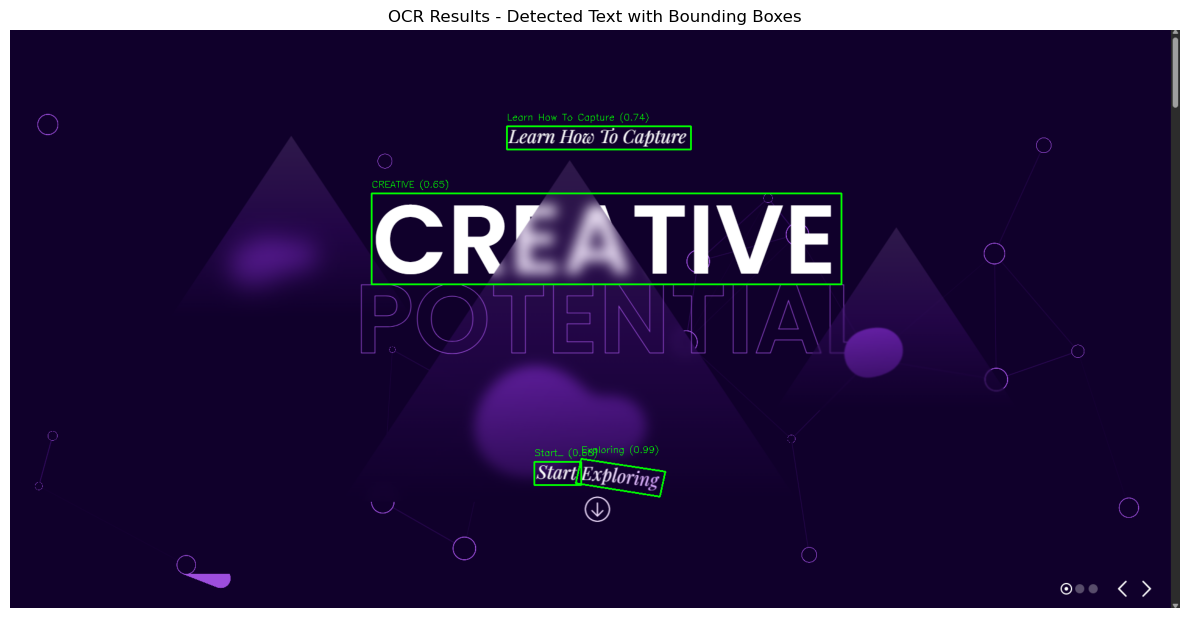


🎯 PREDICTION RESULTS:
   📊 Prediction: AD
   🎲 Confidence: 100.00%
   📈 Probabilities:
     ad: 100.00%
     no_ad: 0.00%


{'image_path': 'C:\\Users\\USER\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-11-03 130647.png',
 'ocr_result': {'combined_text': 'Learn How To Capture CREATIVE Start_ Exploring',
  'individual_texts': ['Learn How To Capture',
   'CREATIVE',
   'Start_',
   'Exploring'],
  'text_info': [{'text': 'Learn How To Capture',
    'confidence': 0.7395001417182147,
    'bbox': [[815, 159], [1117, 159], [1117, 197], [815, 197]]},
   {'text': 'CREATIVE',
    'confidence': 0.6532159150539513,
    'bbox': [[593, 269], [1364, 269], [1364, 418], [593, 418]]},
   {'text': 'Start_',
    'confidence': 0.6837695339295944,
    'bbox': [[860, 709], [937, 709], [937, 747], [860, 747]]},
   {'text': 'Exploring',
    'confidence': 0.9910463840226486,
    'bbox': [[937.0729607040108, 704.0866917312577],
     [1075.958002055931, 725.3533040796611],
     [1066.927039295989, 766.9133082687423],
     [928.0419979440688, 744.6466959203389]]}],
  'raw_results': [([[815, 159], [1117, 159], [1117, 197], [815, 197]

In [49]:
predictor.predict_ad_from_image(r"C:\Users\USER\OneDrive\Pictures\Screenshots\Screenshot 2024-11-03 130647.png")

In [39]:
tough_texts = [
    "Don't miss out on our exclusive seminar today — limited seats available!",
    "Join millions who trust us for quality and reliability every single day.",
    "This summer, discover new adventures and explore the unknown like never before.",
    "Hey, did you check that new cafe downtown? Their coffee tastes amazing!",
    "Act now and claim your free trial before the offer expires!",
    "The latest smartphone just dropped; reviews say it's a game changer for tech lovers.",
    "Weather forecast says sunny, perfect for a day out in the park with friends.",
    "Save big on your next purchase with our flash sale ending tonight.",
    "Reading books during your free time can improve your vocabulary significantly.",
    "Limited time discount on all subscriptions — get yours before midnight!",
    "If you want to improve your skills, consider this workshop starting next week.",
    "Hello everyone! Just wanted to share my thoughts on the new game that released.",
    "Exclusive offer: Buy one, get one free on selected items only this weekend.",
    "The museum has a new exhibition on ancient history, open to the public now."
]

for txt in tough_texts:
    result = predictor.predict_ad_from_text(txt)
    print(f"Text: {txt[:60]}...")
    print(f"Prediction: {result['prediction'].upper()}, Confidence: {result['confidence']:.2%}\n")


Text: Don't miss out on our exclusive seminar today — limited seat...
Prediction: NO_AD, Confidence: 85.20%

Text: Join millions who trust us for quality and reliability every...
Prediction: NO_AD, Confidence: 99.65%

Text: This summer, discover new adventures and explore the unknown...
Prediction: NO_AD, Confidence: 99.86%

Text: Hey, did you check that new cafe downtown? Their coffee tast...
Prediction: AD, Confidence: 90.84%

Text: Act now and claim your free trial before the offer expires!...
Prediction: AD, Confidence: 63.50%

Text: The latest smartphone just dropped; reviews say it's a game ...
Prediction: NO_AD, Confidence: 99.65%

Text: Weather forecast says sunny, perfect for a day out in the pa...
Prediction: NO_AD, Confidence: 99.24%

Text: Save big on your next purchase with our flash sale ending to...
Prediction: NO_AD, Confidence: 74.14%

Text: Reading books during your free time can improve your vocabul...
Prediction: NO_AD, Confidence: 99.06%

Text: Limited time discoun

In [ ]:
# Choose the best performing model (you can change this logic as needed)
best_model_name = max(enhanced_results, key=lambda name: enhanced_results[name]['accuracy'])
best_model = enhanced_results[best_model_name]['model']
best_vectorizer = vectorizers['tfidf']  # or 'count' if you prefer CountVectorizer

# Save the model
with open("text_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

# Save the vectorizer
with open("text_vectorizor.pkl", "wb") as vec_file:
    pickle.dump(best_vectorizer, vec_file)

# Save the scaler
with open("text_scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print(f"\nSaved best model ({best_model_name}) as 'text_model.pkl'")
print("Saved vectorizer as 'text_vectorizor.pkl'")


In [40]:
predictor = test_predictor()
predictor.save_model_artifacts(output_dir="image_artifacts", name_prefix="image")


Using CPU. Note: This module is much faster with a GPU.


🧪 Testing Image Ad Predictor...
🚀 Setting up Image Ad Predictor...
✅ EasyOCR is available
🔄 Initializing EasyOCR...
✅ EasyOCR initialized successfully
🔄 Loading pre-trained models...
📅 Loading models from timestamp: 20250706_143755
✅ Loaded best_model
✅ Loaded tfidf_vectorizer
✅ Loaded scaler
⚠️  Missing analyzer
✅ Models loaded successfully

🎉 Setup complete!
💡 Usage examples:
   predictor.predict_ad_from_image('path/to/image.jpg')
   predictor.predict_ad_from_text('Your text here')
   predictor.batch_predict_images(['img1.jpg', 'img2.jpg'])

📝 Testing text predictions...
--------------------------------------------------
Text: 'Get 50% off now! Limited time offer!...' → AD (99.3%)
Text: 'The weather is nice today...' → NO_AD (96.7%)
Text: 'Buy now and save money! Click here!...' → AD (99.9%)
Text: 'Machine learning is fascinating...' → NO_AD (100.0%)
Text: 'Free shipping on all orders! Don't miss ...' → AD (74.8%)
Text: 'I enjoy reading books in my free time...' → NO_AD (81.2%)

✅ Te

AttributeError: 'ImageAdPredictor' object has no attribute 'save_model_artifacts'

🖼️  Processing image: C:\Users\USER\OneDrive\Desktop\ML 2\NO_AD_IMG\1_th_1458238158.png
🔄 Extracting text from image...
✅ Extracted 2 text segments
📝 Extracted Text: 'STEP3 Would wou click on it? Nothing But Tears'
📊 Text segments found: 2


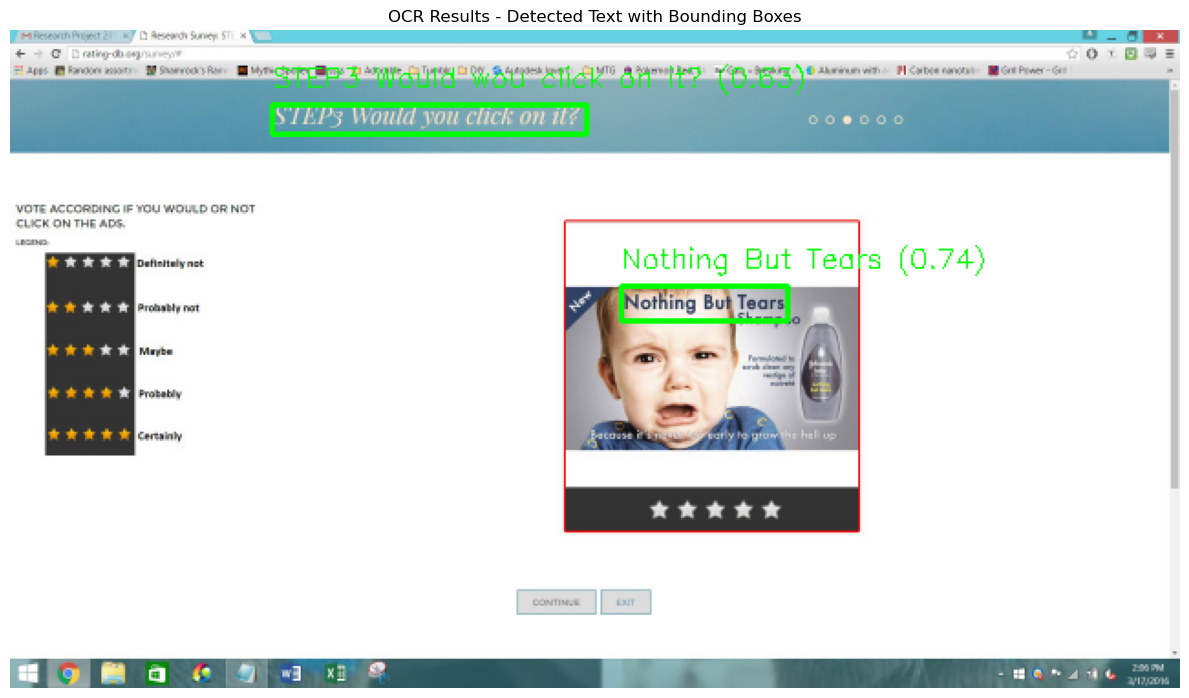


🎯 PREDICTION RESULTS:
   📊 Prediction: AD
   🎲 Confidence: 100.00%
   📈 Probabilities:
     ad: 100.00%
     no_ad: 0.00%


{'image_path': 'C:\\Users\\USER\\OneDrive\\Desktop\\ML 2\\NO_AD_IMG\\1_th_1458238158.png',
 'ocr_result': {'combined_text': 'STEP3 Would wou click on it? Nothing But Tears',
  'individual_texts': ['STEP3 Would wou click on it?', 'Nothing But Tears'],
  'text_info': [{'text': 'STEP3 Would wou click on it?',
    'confidence': 0.634989182115265,
    'bbox': [[143, 41], [315, 41], [315, 57], [143, 57]]},
   {'text': 'Nothing But Tears',
    'confidence': 0.7377787030458868,
    'bbox': [[334, 140], [425, 140], [425, 159], [334, 159]]}],
  'raw_results': [([[32, 10], [94, 10], [94, 16], [32, 16]],
    'heltruli Aaen',
    0.0023367376476636777),
   ([[24, 20], [50, 20], [50, 26], [24, 26]], 'Geaa', 0.008935022167861462),
   ([[186, 18], [210, 18], [210, 26], [186, 26]], 'Deu', 0.13895965177674652),
   ([[143, 41], [315, 41], [315, 57], [143, 57]],
    'STEP3 Would wou click on it?',
    0.634989182115265),
   ([[2, 94], [62, 94], [62, 102], [2, 102]],
    'vot; ACCCRMNC',
    0.168606496032

In [ ]:
predictor.predict_ad_from_image(r"C:\Users\USER\OneDrive\Desktop\ML 2\NO_AD_IMG\1_th_1458238158.png")

In [30]:
def save_model_artifacts(self, model_name="image_model.pkl", vectorizer_name="image_vectorizer.pkl", scaler_name="image_scaler.pkl"):
    """
    Save model, vectorizer, and scaler to disk

    Args:
        model_name: Filename for saving the ML model
        vectorizer_name: Filename for saving the vectorizer
        scaler_name: Filename for saving the scaler (optional)
    """
    if not self.artifacts:
        print("❌ No model artifacts found to save.")
        return

    try:
        # Save model
        model = self.artifacts.get('best_model')
        if model:
            with open(model_name, "wb") as f:
                pickle.dump(model, f)
            print(f"✅ Saved model as '{model_name}'")

        # Save vectorizer
        vectorizer = self.artifacts.get('tfidf_vectorizer')
        if vectorizer:
            with open(vectorizer_name, "wb") as f:
                pickle.dump(vectorizer, f)
            print(f"✅ Saved vectorizer as '{vectorizer_name}'")

        # Save scaler if available
        scaler = self.artifacts.get('scaler')
        if scaler:
            with open(scaler_name, "wb") as f:
                pickle.dump(scaler, f)
            print(f"✅ Saved scaler as '{scaler_name}'")
        else:
            print("⚠️ No scaler found to save.")

    except Exception as e:
        print(f"❌ Failed to save model artifacts: {e}")



In [32]:
predictor = test_predictor()
predictor.save_model_artifacts(
    model_name="image_model.pkl",
    vectorizer_name="image_vectorizer.pkl",
    scaler_name="image_scaler.pkl"
)


Using CPU. Note: This module is much faster with a GPU.


🧪 Testing Image Ad Predictor...
🚀 Setting up Image Ad Predictor...
✅ EasyOCR is available
🔄 Initializing EasyOCR...
✅ EasyOCR initialized successfully
🔄 Loading pre-trained models...
📅 Loading models from timestamp: 20250706_143755
✅ Loaded best_model
✅ Loaded tfidf_vectorizer
✅ Loaded scaler
⚠️  Missing analyzer
✅ Models loaded successfully

🎉 Setup complete!
💡 Usage examples:
   predictor.predict_ad_from_image('path/to/image.jpg')
   predictor.predict_ad_from_text('Your text here')
   predictor.batch_predict_images(['img1.jpg', 'img2.jpg'])

📝 Testing text predictions...
--------------------------------------------------
Text: 'Get 50% off now! Limited time offer!...' → AD (99.3%)
Text: 'The weather is nice today...' → NO_AD (96.7%)
Text: 'Buy now and save money! Click here!...' → AD (99.9%)
Text: 'Machine learning is fascinating...' → NO_AD (100.0%)
Text: 'Free shipping on all orders! Don't miss ...' → AD (74.8%)
Text: 'I enjoy reading books in my free time...' → NO_AD (81.2%)

✅ Te

AttributeError: 'ImageAdPredictor' object has no attribute 'save_model_artifacts'